In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
cnt= 0 
for dirname, _, filenames in os.walk('/kaggle/input/mayo-clinic-strip-ai/train'):
    for filename in filenames:
        cnt+=1
        #print(os.path.join(dirname, filename))
print ('cnt train image',cnt)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

cnt train image 754


In [2]:
# RUNS OUT OF MEMORY
# cnt= 0 
# import os
# os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = str(pow(2,40))
# import cv2
# %matplotlib inline
# import matplotlib.pyplot as plt 
# from PIL import Image
# import numpy as np
# Image.MAX_IMAGE_PIXELS = None

# for dirname, _, filenames in os.walk('/kaggle/input/mayo-clinic-strip-ai/train'):
#     for filename in filenames:
#         cnt+=1
#         img_file =os.path.join(dirname, filename)
#         print ('img_file',img_file)
#         img = Image.open(img_file)
#         img = np.array(img)
        
#         plt.imshow(img)
#         plt.show
#         break


In [3]:
# from PIL import Image
# inp_file = '/kaggle/input/mayo-clinic-strip-ai/train/a4c7df_0.tif'
# im = Image.open(inp_file)
# im.thumbnail(im.size)
# im.save(outfile, "JPEG", quality=100)

# DecompressionBombError: Image size (1698957156 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


In [4]:
# RUNS OUT OF MEMORY
# inp_file = '/kaggle/input/mayo-clinic-strip-ai/train/a4c7df_0.tif'
# import numpy as np
# import tifffile
# from skimage import exposure,io 
# img = io.imread(inp_file, plugin='tifffile') 
# type(img)
# print ('img shape',img.shape)
# import cv2
# resized_img = cv2.resize(img,(784,784))
# %matplotlib inline
# import matplotlib.pyplot as plt 
# plt.imshow(img)

#img shape (55283, 30732, 3)

In [5]:
import os
cnt= 0 
for dirname, _, filenames in os.walk('/kaggle/input/mayo-clinic-strip-ai/train'):
    for filename in filenames:
        cnt+=1
        #print(os.path.join(dirname, filename))
print ('cnt train image',cnt)

cnt train image 754


# Explore Data

properties <_PropertyMap {'openslide.level-count': '1', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '26553', 'openslide.level[0].tile-height': '128', 'openslide.level[0].tile-width': '128', 'openslide.level[0].width': '55831', 'openslide.vendor': 'generic-tiff', 'tiff.ResolutionUnit': 'centimeter', 'tiff.XResolution': '19880.71484375', 'tiff.YResolution': '19880.71484375'}>
dimensions (55831, 26553)
level dimensions ((55831, 26553),)
num levels 1
<class 'PIL.Image.Image'>
region mode RGBA


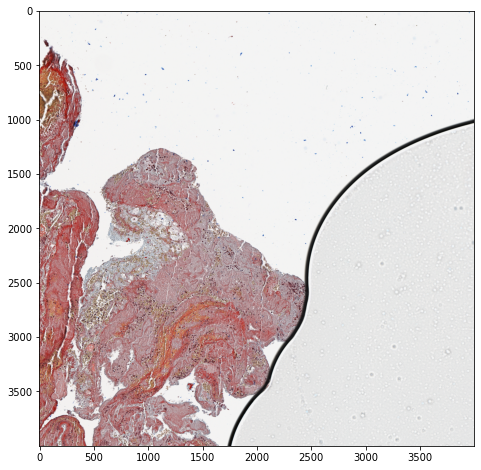

<class 'PIL.Image.Image'>
rgb_region mode RGB


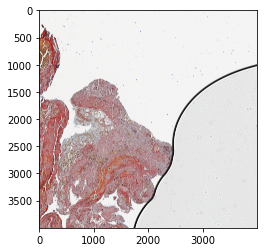

<class 'numpy.ndarray'>
np_rgb_region shape (4000, 4000, 3)


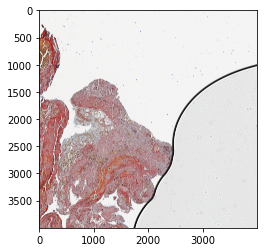

resized_img shape (300, 300, 3)


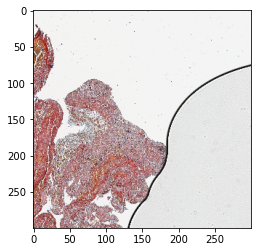

resized_img bytes 270000
gray_img shape (300, 300)


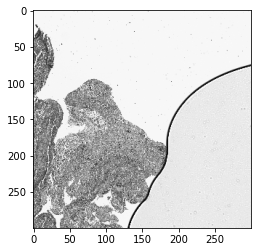

gray_img bytes 90000


In [1]:

import cv2
from openslide import OpenSlide
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

#inp_file = '/kaggle/input/mayo-clinic-strip-ai/train/029c68_0.tif'
inp_file = '/kaggle/input/mayo-clinic-strip-ai/train/006388_0.tif'
inp_file = '/kaggle/input/mayo-clinic-strip-ai/train/008e5c_0.tif'
inp_file = '/kaggle/input/mayo-clinic-strip-ai/train/01adc5_0.tif'
#inp_file = '/kaggle/input/mayo-clinic-strip-ai/train/037300_0.tif'
slider = OpenSlide(inp_file)
print ('properties',slider.properties)
print ('dimensions',slider.dimensions)
print ('level dimensions',slider.level_dimensions)
print ('num levels', len(slider.level_dimensions))
level = 0
#region = (0, 0)
#size = (20000, 20000)
#region = slider.read_region(region, level, size)
#plt.figure(figsize=(8, 8))
#plt.imshow(region)
#plt.show() 
region = (6000, 6000)
#size = (10000, 10000)
size = (4000, 4000)
region = slider.read_region(region, level, size)
print (type(region))
print ('region mode',region.mode)
plt.figure(figsize=(8, 8))
plt.imshow(region)
plt.show() 
rgb_region = region.convert('RGB')
print (type(rgb_region))
print ('rgb_region mode',rgb_region.mode)
plt.imshow(rgb_region)
plt.show() 

#CONVERT TO NUMPY ARRAY
np_rgb_region = np.array(rgb_region)
print (type(np_rgb_region))
print ('np_rgb_region shape',np_rgb_region.shape)
plt.imshow(np_rgb_region)
plt.show() 

#resize to smaller sizes for CNN
resized_img= cv2.resize(np_rgb_region,(300,300))
print ('resized_img shape',resized_img.shape)
plt.imshow(resized_img)
plt.show() 
print ('resized_img bytes',resized_img.nbytes)
gray_img = cv2.cvtColor(resized_img,cv2.COLOR_RGB2GRAY)
print ('gray_img shape',gray_img.shape)
plt.imshow(gray_img,cmap='gray')
plt.show() 
print ('gray_img bytes',gray_img.nbytes)


In [12]:
import os
cnt= 0 
for dirname, _, filenames in os.walk('/kaggle/input/mayo-clinic-strip-ai/train'):
    for filename in filenames:
        cnt+=1
        print(os.path.join(dirname, filename))
        if cnt ==5:
            break


/kaggle/input/mayo-clinic-strip-ai/train/a4c7df_0.tif
/kaggle/input/mayo-clinic-strip-ai/train/f9fc6b_0.tif
/kaggle/input/mayo-clinic-strip-ai/train/0d718a_0.tif
/kaggle/input/mayo-clinic-strip-ai/train/86e319_1.tif
/kaggle/input/mayo-clinic-strip-ai/train/54838a_0.tif


# Explore labels 

In [13]:
import pandas as pd
train_df= pd.read_csv('/kaggle/input/mayo-clinic-strip-ai/train.csv')
train_df.head(10)

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE
5,028989_0,5,028989,0,LAA
6,029c68_0,5,029c68,0,CE
7,032f10_0,7,032f10,0,CE
8,0372b0_0,7,0372b0,0,CE
9,037300_0,11,037300,0,CE


In [14]:
train_image_location_df = '/kaggle/input/mayo-clinic-strip-ai/train/' + train_df['image_id'] + '.tif'
train_image_location_list = train_image_location_df.values
train_image_location_list.shape
#number matches with number of files in train folder

(754,)

# Build Train Dataset

In [15]:
train_images = []

import cv2
from openslide import OpenSlide
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
import time
start = time.time()
print ('start',start)
import os
cnt= 0 
for filename in train_image_location_list:
        cnt+=1
        #print ('inp_file',filename)
        
        slider = OpenSlide(filename)
        level = 0
        region = (1000, 1000)
        #size = (10000, 10000)
        size = (5000, 5000)
        region = slider.read_region(region, level, size)
        
        
        #convert from RGBA to RGB
        
                
        rgb_region = region.convert('RGB')
        
        #rgb_region=region

        #CONVERT TO NUMPY ARRAY
        np_rgb_region = np.array(rgb_region)
        
        #print (np_rgb_region.shape)
        
        #resize to smaller sizes for CNN
        resized_img= cv2.resize(np_rgb_region,(300,300))
        #print (resized_img.shape)
        #gray_img = cv2.cvtColor(resized_img,cv2.COLOR_RGB2GRAY)
        #normalize
        #gray_img = gray_img/255.0
        resized_img = resized_img/255.0

        train_images.append(resized_img)
        
        
        if cnt%10== 9:
            print ('cnt',cnt)
            
            
            
        if cnt > 300:
            break
            
print ('cnt train image',len(train_images))

end = time.time()
print ('end',end)
print('time taken',end - start)
print('time taken minutes',(end - start)/60)


start 1661530242.5755248
cnt 9
cnt 19
cnt 29
cnt 39
cnt 49
cnt 59
cnt 69
cnt 79
cnt 89
cnt 99
cnt 109
cnt 119
cnt 129
cnt 139
cnt 149
cnt 159
cnt 169
cnt 179
cnt 189
cnt 199
cnt 209
cnt 219
cnt 229
cnt 239
cnt 249
cnt 259
cnt 269
cnt 279
cnt 289
cnt 299
cnt train image 301
end 1661531099.4655685
time taken 856.8900437355042
time taken minutes 14.281500728925069


In [17]:
print (len(train_images))
train_images_np = np.asarray(train_images).astype(np.float32)
train_images_np.shape

301


(301, 300, 300, 3)

In [18]:
train_images_np.nbytes

325080000

In [19]:
train_label = train_df['label']
train_label.shape

(754,)

In [20]:
#import tensorflow as tf
#encoded_label = tf.keras.utils.to_categorical(train_label,num_classes=2)
#encoded_label.shape

#ValueError: invalid literal for int() with base 10: 'CE'

In [21]:
train_label.head(10)

0     CE
1     CE
2    LAA
3    LAA
4     CE
5    LAA
6     CE
7     CE
8     CE
9     CE
Name: label, dtype: object

In [22]:

#https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
#Encode the object as an enumerated type or categorical variable.
#This method is useful for obtaining a numeric representation of an array when all that matters is
#identifying distinct values. factorize is available as both a top-level function pandas.factorize(),
#and as a method Series.factorize() and Index.factorize().virtual_documents/

factorized_train_label = train_label.factorize()
factorized_train_label[0][:10]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [23]:
import tensorflow as tf
encoded_label = tf.keras.utils.to_categorical(factorized_train_label[0],num_classes=2)
encoded_label.shape

(754, 2)

In [24]:
encoded_label[:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Define network

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout

brain_model = Sequential()
brain_model.add(Conv2D(32,5,input_shape=(300,300,3),activation='relu'))
brain_model.add(BatchNormalization())
brain_model.add(MaxPool2D(2,2))
brain_model.add(Dropout(0.5))


brain_model.add(Conv2D(64,5,activation='relu'))
brain_model.add(BatchNormalization())
brain_model.add(MaxPool2D(2,2))
brain_model.add(Dropout(0.5))
brain_model.add(Flatten())

brain_model.add(Dense(1000, activation='relu'))
brain_model.add(Dropout(0.5))
brain_model.add(Dense(300, activation='relu'))
brain_model.add(Dropout(0.5))
brain_model.add(Dense(2, activation='softmax'))
#brain_model.add(Dense(2))

brain_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

brain_model.summary()




2022-08-26 16:25:01.381270: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 296, 296, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 64)      51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 144, 144, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 64)        0

In [32]:
import time
start = time.time()
print ('start',start)


epochs=10
brain_model.fit(train_images_np,encoded_label[:train_images_np.shape[0]],epochs=epochs)
#brain_model.fit(train_images_np,y,epochs=epochs)


end = time.time()
print ('end',end)
print('time taken',end - start)
print('time taken minutes',(end - start)/60)

start 1661531103.946472


2022-08-26 16:25:04.066213: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
10/10 [==============================] - 35s 3s/step - loss: 133.4959 - accuracy: 0.6312
Epoch 2/10
10/10 [==============================] - 33s 3s/step - loss: 106.5807 - accuracy: 0.6013
Epoch 3/10
10/10 [==============================] - 32s 3s/step - loss: 120.7449 - accuracy: 0.7076
Epoch 4/10
10/10 [==============================] - 32s 3s/step - loss: 84.4111 - accuracy: 0.6678
Epoch 5/10
10/10 [==============================] - 32s 3s/step - loss: 65.3928 - accuracy: 0.6645
Epoch 6/10
10/10 [==============================] - 33s 3s/step - loss: 38.5292 - accuracy: 0.7309
Epoch 7/10
10/10 [==============================] - 33s 3s/step - loss: 45.4763 - accuracy: 0.7276
Epoch 8/10
10/10 [==============================] - 32s 3s/step - loss: 39.2569 - accuracy: 0.7209
Epoch 9/10
10/10 [==============================] - 33s 3s/step - loss: 26.2579 - accuracy: 0.7176
Epoch 10/10
10/10 [==============================] - 33s 3s/step - loss: 29.1678 - accuracy: 0.7176
end 16

# Prediction on test data

In [33]:
import pandas as pd
test_df= pd.read_csv('/kaggle/input/mayo-clinic-strip-ai/test.csv')
print (test_df.head(10))
test_df_image_location_df = '/kaggle/input/mayo-clinic-strip-ai/test/' + test_df['image_id'] + '.tif'
test_df_image_location_list = test_df_image_location_df.values
test_df_image_location_list.shape


   image_id  center_id patient_id  image_num
0  006388_0         11     006388          0
1  008e5c_0         11     008e5c          0
2  00c058_0         11     00c058          0
3  01adc5_0         11     01adc5          0


(4,)

In [34]:
test_images = []

import cv2
from openslide import OpenSlide
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
import time
start = time.time()
print ('start',start)
import os
cnt= 0 
for filename in test_df_image_location_list:
        cnt+=1
        #print ('inp_file',filename)
        
        slider = OpenSlide(filename)
        level = 0
        region = (1000, 1000)
        #size = (10000, 10000)
        size = (5000, 5000)
        region = slider.read_region(region, level, size)
        
        
        #convert from RGBA to RGB
                
        rgb_region = region.convert('RGB')
        
        #rgb_region=region

        #CONVERT TO NUMPY ARRAY
        np_rgb_region = np.array(rgb_region)
        
        #print (np_rgb_region.shape)
        
        #resize to smaller sizes for CNN
        resized_img= cv2.resize(np_rgb_region,(300,300))
        #print (resized_img.shape)
        #gray_img = cv2.cvtColor(resized_img,cv2.COLOR_RGB2GRAY)
        #gray_img = gray_img/255.0
        resized_img = resized_img/255.0

        test_images.append(resized_img)
        
        
        if cnt%10== 9:
            print ('cnt',cnt)
            #break
            
print ('cnt train image',len(test_images))

end = time.time()
print ('end',end)
print('time taken',end - start)
print('time taken minutes',(end - start)/60)


start 1661531432.2674155
cnt train image 4
end 1661531451.7159882
time taken 19.448572635650635
time taken minutes 0.3241428772608439


In [35]:
print (len(test_images))
test_images_np = np.asarray(test_images).astype(np.float32)
test_images_np.shape
#test_images_np=np.reshape(test_images_np,(len(test_images_np),300,300,1))


4


(4, 300, 300, 3)

In [36]:
#test_images_np[2]

In [37]:
test_prediction = brain_model.predict(test_images_np)
test_prediction

array([[1.0000000e+00, 1.7527825e-27],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.7703980e-26]], dtype=float32)

In [43]:
test_prediction[2][0],test_prediction[2][1]

(1.0, 0.0)

In [44]:
test_prediction[0][0],test_prediction[0][1]

(1.0, 1.7527825e-27)

In [45]:
test_prediction[0][1]

1.7527825e-27

In [49]:
np.set_printoptions(suppress=True)
test_prediction[3][0], test_prediction[3][1]

(1.0, 5.770398e-26)